In [1]:
import sys, pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.patches import Patch

# Make project root importable
root = pathlib.Path('..', '..').resolve()
sys.path.append(str(root))

from quasar.planner import Planner
from benchmarks.circuits import ghz_circuit, w_state_circuit, random_hybrid_circuit
from benchmarks.partition_circuits import mixed_backend_subsystems, hybrid_dense_to_mps_circuit


/tmp/ipykernel_46781/719670822.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  backend_codes = pivot.replace(backend_to_code).astype(float)


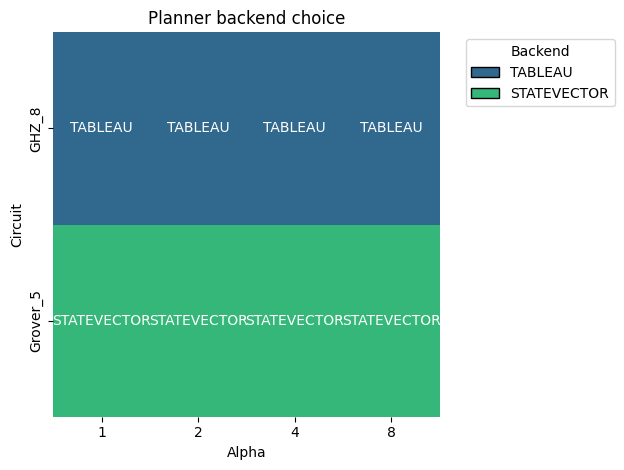

In [2]:
alphas = [0.01, 0.1, 0.5, 2, 8]
circuits = {
    'GHZ_6': ghz_circuit(6),
    'WState_6': w_state_circuit(6),
    'RandomHybrid_6': random_hybrid_circuit(num_qubits=6, depth=6, seed=2),
    'MixedSubsystems': mixed_backend_subsystems(ghz_width=4, qaoa_width=4, qaoa_layers=2, random_width=4, seed=11),
    'HybridDenseToMPS': hybrid_dense_to_mps_circuit(ghz_width=4, random_width=5, qaoa_width=5, qaoa_layers=3, seed=5),
}
records = []
for name, circ in circuits.items():
    for alpha in alphas:
        planner = Planner(conversion_cost_multiplier=alpha)
        plan = planner.plan(circ)
        records.append(
            {
                'circuit': name,
                'alpha': alpha,
                'backend': plan.final_backend.name,
                'steps': [step.backend.name for step in plan.steps],
            }
        )
df = pd.DataFrame(records)
pivot = df.pivot(index='circuit', columns='alpha', values='backend')
pivot = pivot.reindex(index=list(circuits.keys()), columns=alphas)
backend_abbrev = {
    'TABLEAU': 'TAB',
    'DECISION_DIAGRAM': 'DD',
    'MPS': 'MPS',
    'STATEVECTOR': 'SV',
}
backend_categories = pd.Categorical(df['backend'], categories=pd.unique(df['backend']), ordered=True)
backend_labels = list(backend_categories.categories)
backend_display_labels = [backend_abbrev.get(name, name) for name in backend_labels]
backend_to_code = {backend: code for code, backend in enumerate(backend_labels)}
backend_codes = pivot.replace(backend_to_code).astype(float)
annot_labels = pivot.replace(backend_abbrev)
cmap = ListedColormap(sns.color_palette('viridis', n_colors=len(backend_labels)))
norm = BoundaryNorm(np.arange(-0.5, len(backend_labels) + 0.5), cmap.N)
ax = sns.heatmap(backend_codes, annot=annot_labels.values, fmt='', cmap=cmap, cbar=False, norm=norm)
legend_handles = [Patch(facecolor=cmap.colors[i], edgecolor='black') for i in range(len(backend_labels))]
ax.legend(legend_handles, backend_display_labels, title='Backend', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Alpha')
ax.set_ylabel('Circuit')
plt.title('Planner backend choice')
plt.tight_layout()
plt.show()
results = df[['circuit', 'alpha', 'steps']]


In [10]:
for key, value in _params.items():
    print(f"\n---------\n{key}:")
    if isinstance(value, dict):
        for subkey, subvalue in value.items():
            print(type(subvalue))
    elif isinstance(value, list):
        print(type(value[0]))
    else:
        print(type(value))


---------
In:
<class 'str'>

---------
Out:
<class 'type'>

---------
alphas:
<class 'int'>

---------
circuits:
<class 'quasar.circuit.Circuit'>
<class 'quasar.circuit.Circuit'>

---------
records:
<class 'dict'>

---------
name:
<class 'str'>

---------
alpha:
<class 'int'>

---------
kwargs:
<class 'int'>

---------
backend_labels:
<class 'str'>

---------
backend_to_code:
<class 'int'>
<class 'int'>

---------
legend_handles:
<class 'matplotlib.patches.Patch'>

---------
nb_name:
<class 'str'>


In [16]:
import json, pathlib
try:
    import ipynbname
    nb_name = ipynbname.path().stem
except Exception:  # pragma: no cover
    nb_name = 'plan_choice_heatmap'
_params = {k: v for k, v in globals().items() if not k.startswith('_') and isinstance(v, (int, float, str, bool, list, dict, tuple))}
_params.pop("legend_handles", None)
_params.pop("Out", None)
_params.pop("In", None)
pathlib.Path('../results').mkdir(exist_ok=True)
with open(f"../results/{nb_name}_params.json", 'w') as f:
    json.dump(_params, f, indent=2)
with open(f"../results/{nb_name}_results.json", 'w') as f:
    json.dump(results.to_dict(orient='records'), f, indent=2)
print(json.dumps(_params, indent=2))


{
  "alphas": [
    1,
    2,
    4,
    8
  ],
  "circuits": {
    "GHZ_8": {
      "use_classical_simplification": true,
      "gates": [
        {
          "gate": "H",
          "qubits": [
            0
          ],
          "entanglement": "none",
          "compatible_methods": [
            "tableau"
          ],
          "resource_estimates": {
            "tableau": {
              "time": 5.32,
              "memory": 0.665,
              "log_depth": 0.0,
              "conversion": 0.0,
              "replay": 0.0
            }
          }
        },
        {
          "gate": "CX",
          "qubits": [
            0,
            1
          ],
          "entanglement": "creates",
          "compatible_methods": [
            "tableau"
          ],
          "resource_estimates": {
            "tableau": {
              "time": 18.64,
              "memory": 2.33,
              "log_depth": 1.0,
              "conversion": 0.0,
              "replay": 0.0
            